--- 1. Loading the Dataset ---
Tumor_Detection.csv loaded successfully.

--- 2. Data Cleaning and Preprocessing ---
Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    fl

C:\Users\ansum\AppData\Local\Temp\ipykernel_24884\2717452286.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='viridis')


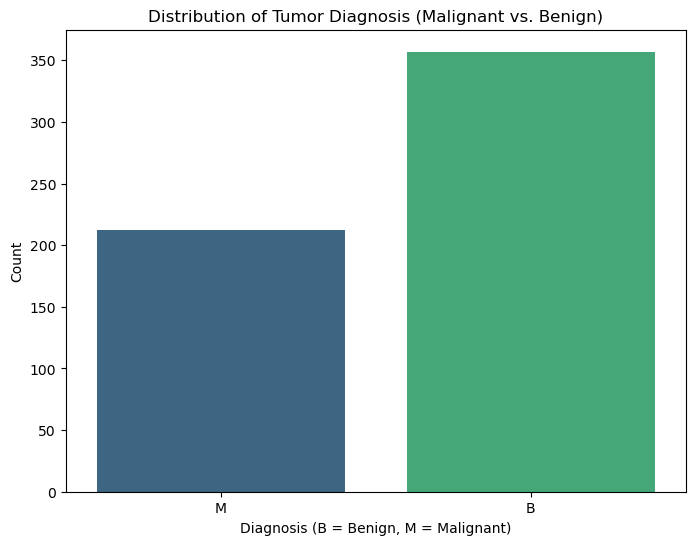


Generating correlation heatmap...


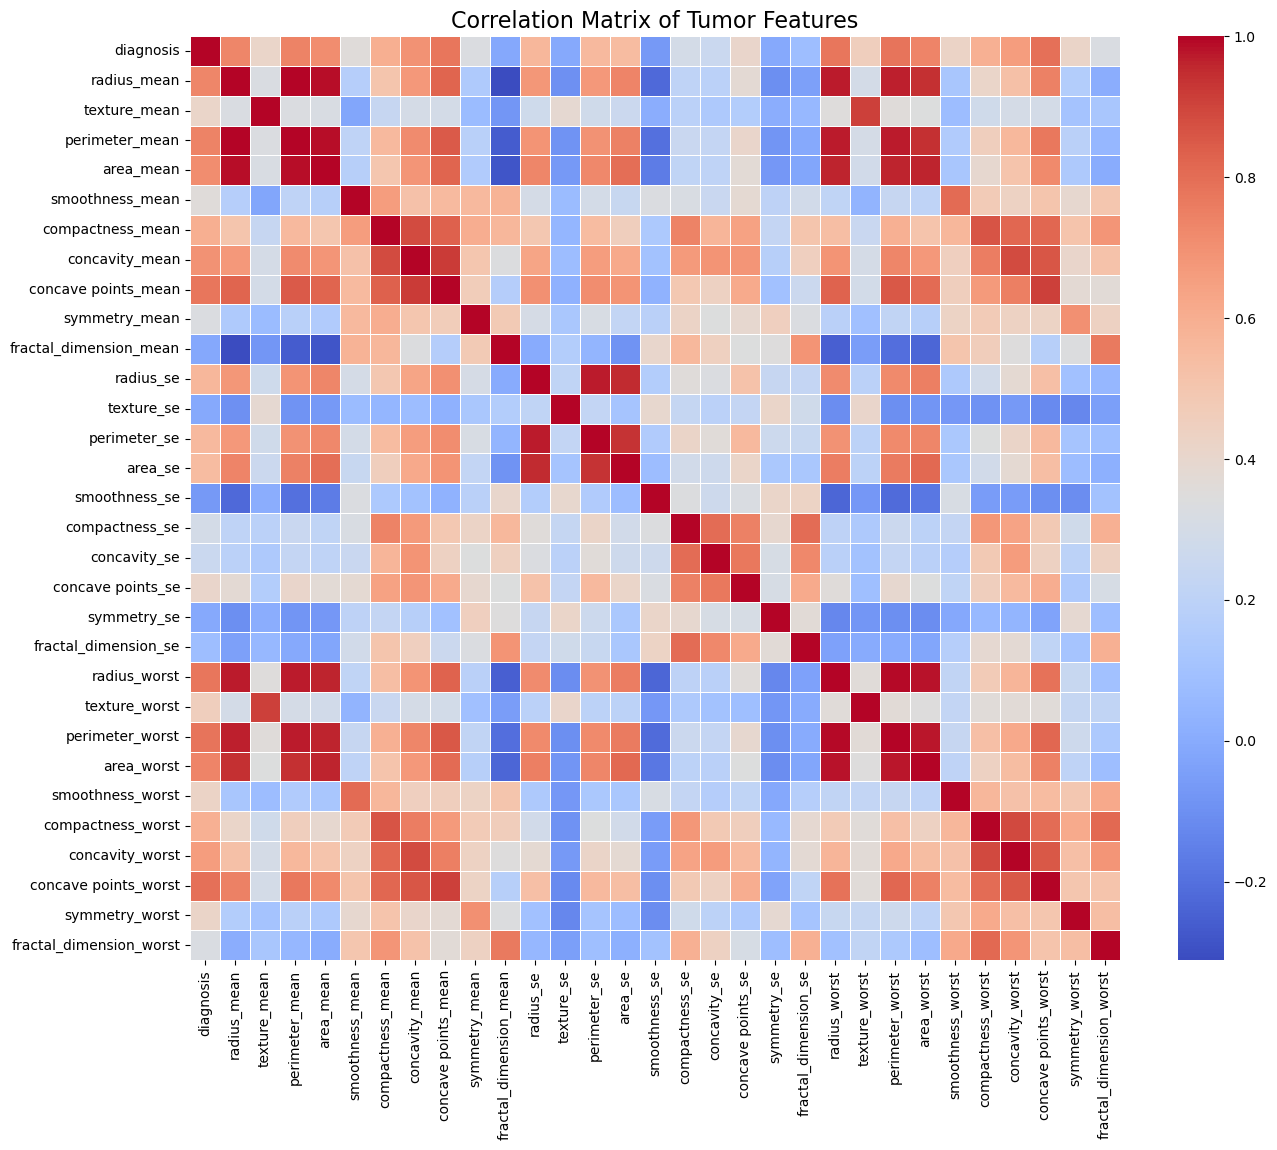


--- 4. Data Preprocessing for Modeling ---
Diagnosis labels encoded (B -> 0, M -> 1).
Features scaled using StandardScaler.
Training set shape: (426, 30), (426,)
Testing set shape: (143, 30), (143,)

--- 5. Model Building and Evaluation (Random Forest Classifier) ---
Random Forest Classifier trained successfully.

Model Accuracy: 0.9650

Confusion Matrix:
[[90  0]
 [ 5 48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143


--- 6. Summary of Findings ---
Project Objective:
The goal was to classify tumors as malignant or benign using a Random Forest Classifier and visualize the data.

Key Findings:
 - The Random Forest model achieved a high accuracy of 0.97, demonstrating its effectiveness 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# =============================================================================
# Problem Statement: Tumor Detection
# =============================================================================
# This project involves handling a medical dataset, preprocessing it,
# conducting EDA, and applying a machine learning model (Random Forest)
# to classify tumors as malignant or benign.

# --- 1. Load the Dataset ---
print("--- 1. Loading the Dataset ---")
try:
    df = pd.read_csv('Tumor_Detection.csv')
    print("Tumor_Detection.csv loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure the CSV file is in the same directory.")
    exit()

# --- 2. Data Cleaning and Preprocessing ---
print("\n--- 2. Data Cleaning and Preprocessing ---")

# Inspect the dataset for unnecessary columns and missing values
print("Initial Dataset Information:")
df.info()

# Drop irrelevant columns: 'id' and any unnamed columns
# The 'id' column is an identifier, and the 'unnamed' column is empty
# based on common datasets of this type. We'll drop it if it exists.
columns_to_drop = ['id']
if 'Unnamed: 32' in df.columns:
    columns_to_drop.append('Unnamed: 32')
df = df.drop(columns=columns_to_drop, axis=1)

# Check for and handle any remaining missing values
print("\nChecking for missing values:")
print(df.isnull().sum().sort_values(ascending=False))
# Based on the info, there are no significant missing values to handle after dropping the Unnamed column

print("\nDataset cleaned and prepared for EDA.")
print(f"Cleaned dataset shape: {df.shape}")

# --- 3. Exploratory Data Analysis (EDA) ---
print("\n--- 3. Exploratory Data Analysis (EDA) ---")

# 3.1 Distribution of Diagnosis
print("Generating count plot for 'diagnosis'...")
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df, palette='viridis')
plt.title('Distribution of Tumor Diagnosis (Malignant vs. Benign)')
plt.xlabel('Diagnosis (B = Benign, M = Malignant)')
plt.ylabel('Count')
plt.show()

# 3.2 Correlation Analysis and Heatmap
print("\nGenerating correlation heatmap...")
# Encode the 'diagnosis' column for numerical correlation
df_encoded = df.copy()
df_encoded['diagnosis'] = LabelEncoder().fit_transform(df_encoded['diagnosis'])
correlation_matrix = df_encoded.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Tumor Features', fontsize=16)
plt.show()

# --- 4. Data Preprocessing for Modeling ---
print("\n--- 4. Data Preprocessing for Modeling ---")

# 4.1 Separate features (X) and target (y)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# 4.2 Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Diagnosis labels encoded (B -> 0, M -> 1).")

# 4.3 Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features scaled using StandardScaler.")

# 4.4 Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

# --- 5. Model Building and Evaluation ---
print("\n--- 5. Model Building and Evaluation (Random Forest Classifier) ---")

# 5.1 Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Classifier trained successfully.")

# 5.2 Make predictions on the test set
y_pred = rf_model.predict(X_test)

# 5.3 Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# --- 6. Summary of Findings ---
print("\n--- 6. Summary of Findings ---")
print("Project Objective:")
print("The goal was to classify tumors as malignant or benign using a Random Forest Classifier and visualize the data.")
print("\nKey Findings:")
print(f" - The Random Forest model achieved a high accuracy of {accuracy:.2f}, demonstrating its effectiveness in distinguishing between malignant and benign tumors based on the provided features.")
print(" - The EDA revealed that most features are highly correlated with each other, which is typical for this dataset.")
print(" - The count plot showed that the dataset is slightly imbalanced, with more benign tumors than malignant ones.")
print(" - The confusion matrix indicates that the model performed well in correctly classifying both tumor types, with very few misclassifications.")
print("\nConclusion:")
print("This project successfully demonstrated the end-to-end process of a machine learning workflow: from data cleaning and exploration to model training and evaluation. The Random Forest Classifier proved to be a robust model for this binary classification problem, highlighting the predictive power of the tumor characteristics.")